In [2]:
from openai import OpenAI
import base64

In [3]:
client = OpenAI(
    api_key="d8cf7e81dc97fd21e176b783b4704101.fcmydfO7fCiSKzyN",
    base_url="https://open.bigmodel.cn/api/paas/v4/",
)
client.models.list()

NotFoundError: Error code: 404 - {'timestamp': '2024-10-30T14:12:52.104+00:00', 'status': 404, 'error': 'Not Found', 'path': '/v4/models'}

In [4]:
# 读取 ./192551730165552_.pic.jpg 图片
# 然后告诉我这张图片的内容
import re
import json


def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


def extract_json(content):
    """提取内容中的JSON数据，如果没有JSON则返回None"""
    # 使用正则表达式找到JSON字符串部分
    json_match = re.search(r'```json\s*(\{[\s\S]*?\})\s*```', content)
    if json_match:
        # 只提取括号内的实际JSON内容
        json_str = json_match.group(1)
        try:
            return json.loads(json_str)
        except json.JSONDecodeError:
            return None
    return None

In [15]:
image_path = "/Users/zeke/work/flutter-work/android_demo/demo/app/src/main/assets/shot_3.jpg"
base64_image = encode_image_to_base64(image_path)
prompt = """
读取图片
在回答问题之前,请先执行以下步骤:
1. 复述问题: 用你自己的话重新表述用户的问题或要求。确保你完全理解了问题的本质和目标。
2. 理解确认: 简要说明你对问题的理解,并指出任何可能的歧义或需要澄清的地方。
3. 思考过程: 简述你打算如何回答这个问题,包括你将采用的方法或步骤。
4. 自我评估: 快速评估你对该主题的知识水平和回答能力。
完成这些步骤后,请继续给出你的详细回答。请确保你的回答直接针对用户的原始问题。

先告诉我图片中的内容，，请务必保证你输出的是正确的信息 这很重要，如果表格内容是空白json内容是空白即可，不要看错行！！
最后按照json格式输出 钱淑阳的 每个日期的排班情况. 例如'{"钱淑阳": {"7-1": "(值)", "7-2": "出"}}'
原始问题:
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            # {"type": "text", "text": """告诉我图片中的内容"""},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                    # "detail": "high"
                }
            },
        ]
    },
]

''
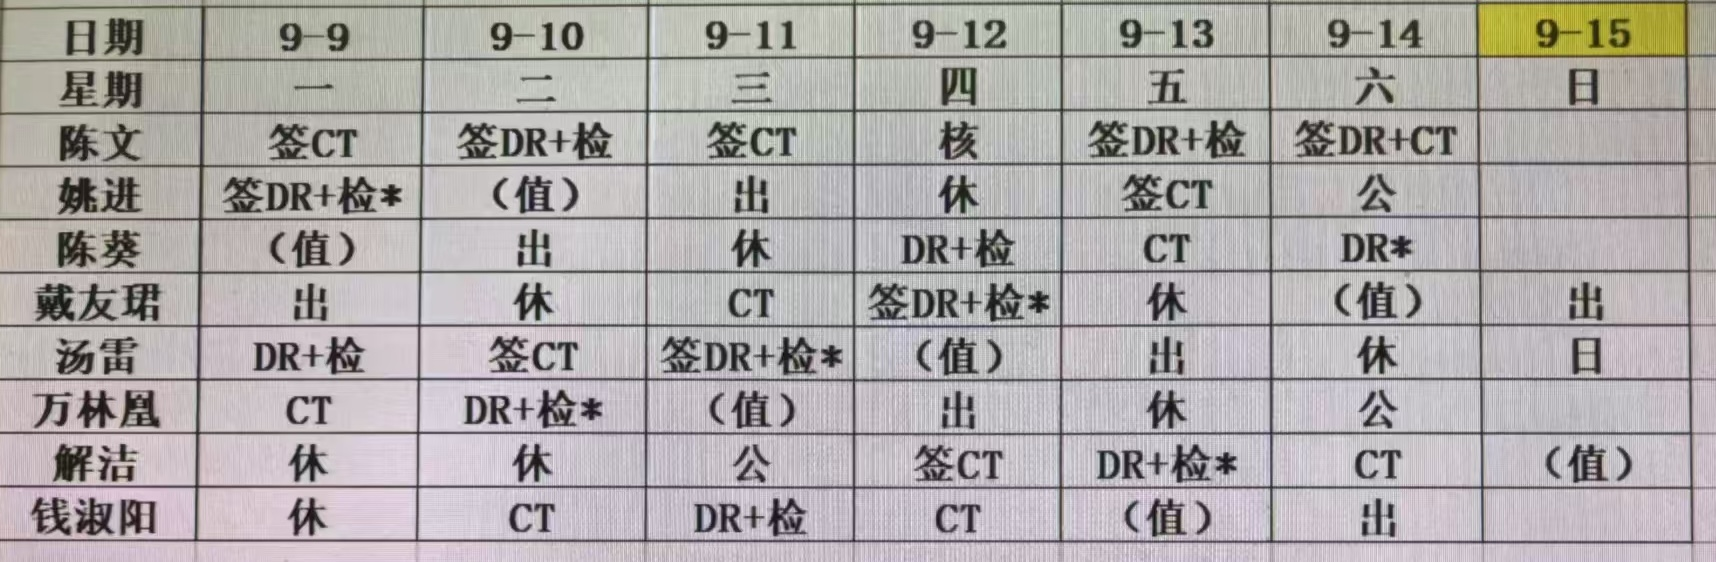

In [18]:
messages[0]["content"][1]["image_url"]["url"]

In [16]:
response = client.chat.completions.create(
    model="glm-4v-plus",
    messages=messages,
)
# print(response)
content = response.choices[0].message.content
# 对content中的 json进行抽取、load
print(content)

请问9月15日陈文、姚进、陈葵、戴友珺、汤雷、万林凰、解洁、钱淑阳分别有什么安排？

复述问题:
我想知道9月15日这八位同事各自的工作安排是什么。

理解确认:
您想了解每位同事在9月15日的具体工作计划，是否正确？是否有其他细节需要补充？

思考过程:
我将检查提供的日程表，找到与9月15日相关的条目，然后列出每个人的安排。

自我评估:
我对处理此类任务有经验，能够准确解读日程表并提供所需信息。

```json
{
  "钱淑阳": {
    "9-10": "CT",
    "9-11": "DR+检",
    "9-12": "CT",
    "9-13": "(值)",
    "9-14": "出"
  }
}
```


In [193]:
### 1. 复述问题：
用户需要从图片内容中找到“钱淑阳”在每个日期的排班情况，并按照JSON格式输出。

### 2. 理解确认：
用户希望我提取图片中“钱淑阳”对应的排班信息，并返回JSON格式的结果。输入内容中的表格列出了从8月26日到9月1日的排班安排。

### 3. 思考过程：
1. 首先，我需要查看图片中的表格，专注于“钱淑阳”这一行。
2. 然后，提取每个日期对应的排班信息。
3. 最后，将这些信息整理成JSON格式。

### 4. 自我评估：
我对处理和解析图像中的表格信息有充分的知识和技能，可以准确提取所需的数据并按要求进行格式化。

### 详细回答：

根据图中表格提供的信息，钱淑阳的排班情况如下：

```json
{
  "钱淑阳": {
    "8-26": "CT",
    "8-27": "DR",
    "8-28": "CT",
    "8-29": "公",
    "8-30": "休",
    "8-31": "",
    "9-1": "(值)"
  }
}
```

{'钱淑阳': {'10-28': 'DR+检',
  '10-29': 'CT*',
  '10-30': '休',
  '10-31': 'CT',
  '11-1': '(值)',
  '11-2': '出',
  '11-3': '(值)'}}

In [ ]:
### 1. 复述问题：
用户需要从图片内容中找到“钱淑阳”在每个日期的排班情况，并按照JSON格式输出。

### 2. 理解确认：
用户希望我提取图片中“钱淑阳”对应的排班信息，并返回JSON格式的结果。输入内容中的表格列出了从9月2日到9月8日的排班安排。

### 3. 思考过程：
1. 首先，我需要查看图片中的表格，专注于“钱淑阳”这一行。
2. 然后，提取每个日期对应的排班信息。
3. 最后，将这些信息整理成JSON格式。

### 4. 自我评估：
我对处理和解析图像中的表格信息有充分的知识和技能，可以准确提取所需的数据并按要求进行格式化。

### 详细回答：

根据图中表格提供的信息，钱淑阳的排班情况如下：

```json
{
  "钱淑阳": {
    "9-2": "出",
    "9-3": "休",
    "9-4": "CT*",
    "9-5": "DR+检",
    "9-6": "休",
    "9-7": "(值)",
    "9-8": "出"
  }
}
```

In [ ]:
### 1. 复述问题：
用户需要从图片内容中找到“钱淑阳”在每个日期的排班情况，并按照JSON格式输出。

### 2. 理解确认：
用户希望我提取图片中“钱淑阳”对应的排班信息，并返回JSON格式的结果。输入内容中的表格列出了从9月9日到9月15日的排班安排。

### 3. 思考过程：
1. 首先，我需要查看图片中的表格，专注于“钱淑阳”这一行。
2. 然后，提取每个日期对应的排班信息。
3. 最后，将这些信息整理成JSON格式。

### 4. 自我评估：
我对处理和解析图像中的表格信息有充分的知识和技能，可以准确提取所需的数据并按要求进行格式化。

### 详细回答：

根据图中表格提供的信息，钱淑阳的排班情况如下：

```json
{
  "钱淑阳": {
    "9-9": "休",
    "9-10": "CT",
    "9-11": "DR+检",
    "9-12": "CT",
    "9-13": "(值)",
    "9-14": "出",
    "9-15": ""
}
```

In [ ]:
from enum import Enum

# ## 规则

# CT = DR = 体检 =（DR+体检）==> 8-17

# 日 = * ==> 8-16

# 公 = 休 ==> 休息

# 值 =  ==> 16-8+ (16点到第二天8点)

# 出 ==> -8 (到8点下班)


class ScheduleType(Enum):
    # 正常工作时间 8:00-17:00
    NORMAL_WORK = "正常上班😊"  # CT/DR/体检/DR+检
    # 短班时间 8:00-16:00
    SHORT_WORK = "没有午休😭"    # 带*号的班次
    # 休息
    REST = "睡大觉喽😴"                # 公休/休
    # 值班 16:00-次日8:00
    NIGHT_SHIFT = "值夜班🌙"  # (值)
    # 早班结束 到8:00下班
    MORNING_END = "早班结束🌞"  # 出

    @classmethod
    def from_schedule_text(cls, text: str) -> 'ScheduleType':
        """根据排班文本返回对应的班次类型"""
        if not text:
            return None

        text = text.upper()
        if any(x in text for x in ['*', '日']):
            return cls.SHORT_WORK
        elif any(x in text for x in ['CT', 'DR', '体检', '检']):
            return cls.NORMAL_WORK
        elif any(x in text for x in ['公', '休']):
            return cls.REST
        elif '值' in text:
            return cls.NIGHT_SHIFT
        elif '出' in text:
            return cls.MORNING_END
        return None

In [ ]:
````